<center><h1>EE69205: Signal Processing System Design</h1></center>
<center><h2>Experiment-2: Image Filtering and Processing</h2></center>
<center><h3>Anirvan Krishna | 21EE38002<h3></center>

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from scipy.ndimage import gaussian_laplace , maximum_filter, uniform_filter, convolve

## Original Image

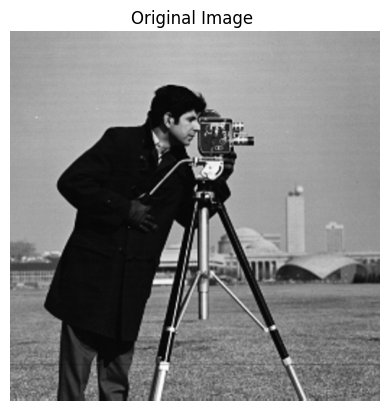

In [64]:
img = cv2.imread('images/cameraman.tif', cv2.IMREAD_GRAYSCALE)
# Display the original image
plt.imshow(img , cmap ='gray')
plt.title('Original Image ')
plt.axis('off')
plt.show()

### Adding Salt and Pepper Noise

(-0.5, 511.5, 511.5, -0.5)

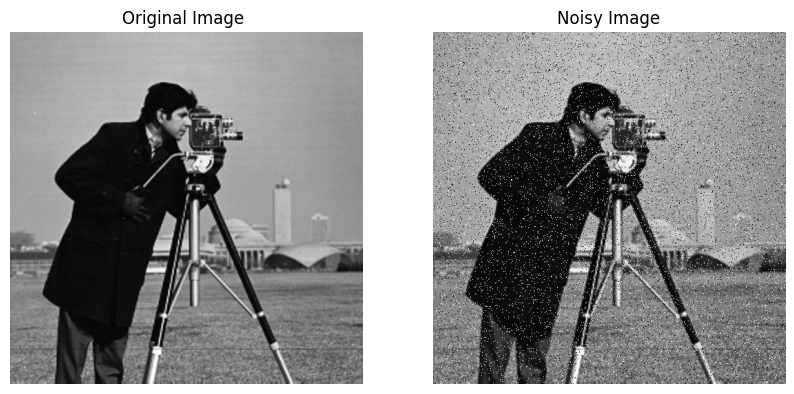

In [65]:
salt_prob = 0.02
pepper_prob = 0.05

noisy_img = random_noise(img, mode='s&p', amount = salt_prob + pepper_prob)
noisy_img = (255*noisy_img).astype(np.uint8)

# Set the figure size
plt.figure(figsize=(10, 15))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image ')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

## Low-Pass Filtering
In this section we'll implement three low-pass filtering techniques and calculate the PSNR values of the image with/without filtering:

- Mean Filter

$$K_{\text{mean}} = \frac{1}{9} \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\1 & 1 & 1 \end{bmatrix}$$
- Gaussian Filter
$$ K_{\text{gaussian}} = \frac{1}{16} \begin{bmatrix} 1 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{bmatrix}  $$

- Median Filter: Replace every $3\times 3$ neighbourhood by its median

In [66]:
def calculate_psnr(original_img, noisy_img):
    """
    img1: first image (original image)
    img2: second image (reconstructed image)
    return: PSNR value
    """
    mse = np.mean((original_img - noisy_img) ** 2)
    max_pixel = np.max(original_img)
    psnr = 10 * np.log10((max_pixel ** 2) / mse)

    return psnr

### Mean Filtering

In [67]:
def mean_filter(img):
    """
    img: input image
    return: filtered image
    """
    kernel = np.ones((3, 3)) / 9
    filtered_img = cv2.filter2D(img, -1, kernel)
    
    return filtered_img

PSNR Values: 
Original and Noisy: 39.201
Original and Filtered:  31.014


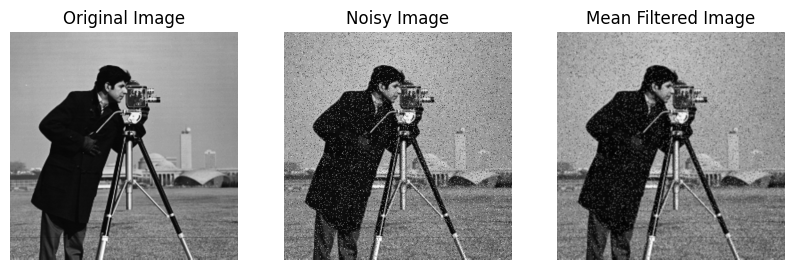

In [68]:
filtered_img = mean_filter(noisy_img)

print("PSNR Values: ")
print(f"Original and Noisy:{calculate_psnr(img, noisy_img): .3f}")
print(f"Original and Filtered: {calculate_psnr(img, filtered_img): .3f}")

plt.figure(figsize=(10, 15))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_img, cmap='gray')
plt.title('Mean Filtered Image')
plt.axis('off')

# Show the figure
plt.show()

### Gaussian Filter

In [69]:
def gaussian_filter(img):
    
    """
    img: input image
    return gaussian filtered image
    """

    kernel = np.array([[1, 2, 1],
                       [2, 4, 2],
                       [1, 2, 1]]) / 16
    
    filtered_img = cv2.filter2D(img, -1, kernel)

    return filtered_img

PSNR Values: 
Original and Noisy: 39.201
Original and Filtered:  31.244


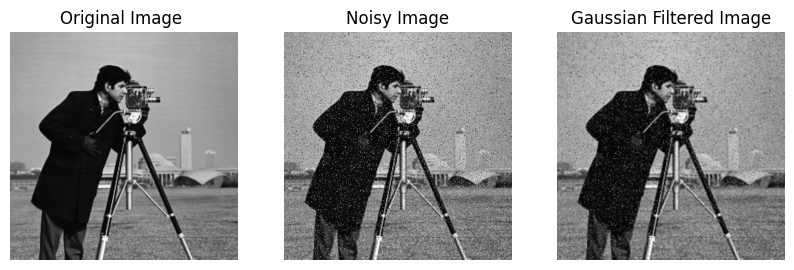

In [70]:
gaussian_img = gaussian_filter(noisy_img)

print("PSNR Values: ")
print(f"Original and Noisy:{calculate_psnr(img, noisy_img): .3f}")
print(f"Original and Filtered: {calculate_psnr(img, gaussian_img): .3f}")

plt.figure(figsize=(10, 15))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image ')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gaussian_img, cmap='gray')
plt.title('Gaussian Filtered Image')
plt.axis('off')
plt.show()

### Median Filter

In [71]:
def median_filter(img):
    """
    img: input image
    return: median filtered image
    """
    filtered_img = cv2.medianBlur(img, 3)
        
    return filtered_img

PSNR Values: 
Original and Noisy: 39.201
Original and Filtered:  39.021


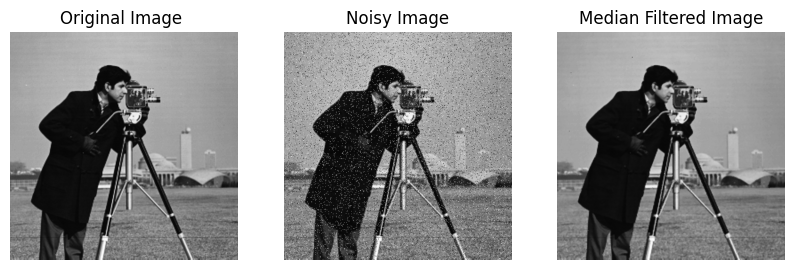

In [72]:
median_img = median_filter(noisy_img)

plt.figure(figsize=(10, 15))

print("PSNR Values: ")
print(f"Original and Noisy:{calculate_psnr(img, noisy_img): .3f}")
print(f"Original and Filtered: {calculate_psnr(img, median_img): .3f}")

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image ')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(median_img, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')
plt.show()

# Basic Edge Detection Techniques

## High Pass Filtering for Edge Detection
In this section we will apply high pass filtering techniques on images polluted with salt and pepper noise. We'll be applying these filtering techniques on the image.

- Laplacian Filter
$$\mathbf{L} = \begin{bmatrix} 0 & -1 & 0 \\ -1 & 4 & -1 \\ 0 & -1 & 0 \end{bmatrix}$$

- Horizontal Sobel Filter
 
$$ \mathbf{S_x} = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix} $$

- Vertical Sobel Filter

$$ \mathbf{S_y} = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix} $$

- Horizontal Prewitt Filter
$$ \mathbf{P_x} = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix} $$

- Vertical Prewitt Filter
$$ \mathbf{P_y} = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix} $$

### Laplacian Filter

In [73]:
def laplacian_filter(img):
    """
    img: input image
    return: filtered image using Laplacian filter
    """
    kernel = np.array([[0, -1, 0],
                       [-1, 4, -1],
                       [0, -1, 0]])
    
    filtered_img = np.zeros_like(img)
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            filtered_img[i, j] = np.sum(img[i-1:i+2, j-1:j+2] * kernel)
    
    return filtered_img

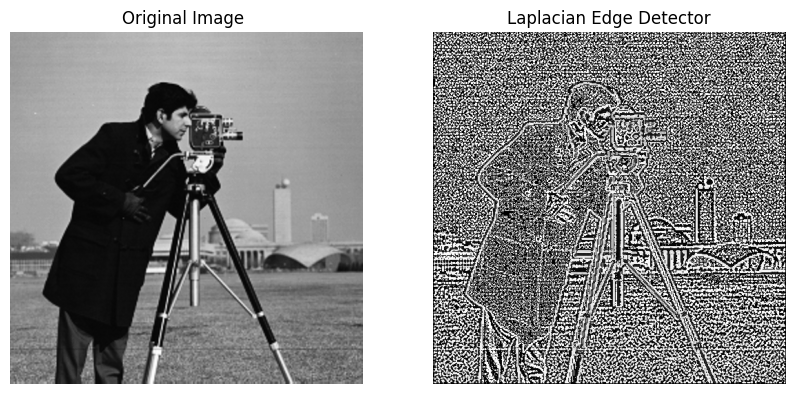

In [74]:
img_laplacian = laplacian_filter(img)

plt.figure(figsize=(10, 15))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image ')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_laplacian, cmap='gray')
plt.title('Laplacian Edge Detector')
plt.axis('off')
plt.show()

### Sobel Filtering

In [75]:
def sobel_horizontal_filter(img):
    """
    img: input image
    return: filtered image using horizontal Sobel filter
    """
    kernel = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]])

    filtered_img = np.zeros_like(img)
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            filtered_img[i, j] = np.sum(img[i-1:i+2, j-1:j+2] * kernel)

    return filtered_img


def sobel_vertical_filter(img):
    """
    img: input image
    return: filtered image using vertical Sobel filter
    """
    kernel = np.array([[-1, -2, -1],
                       [0, 0, 0],
                       [1, 2, 1]])

    filtered_img = np.zeros_like(img)
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            filtered_img[i, j] = np.sum(img[i-1:i+2, j-1:j+2] * kernel)

    return filtered_img

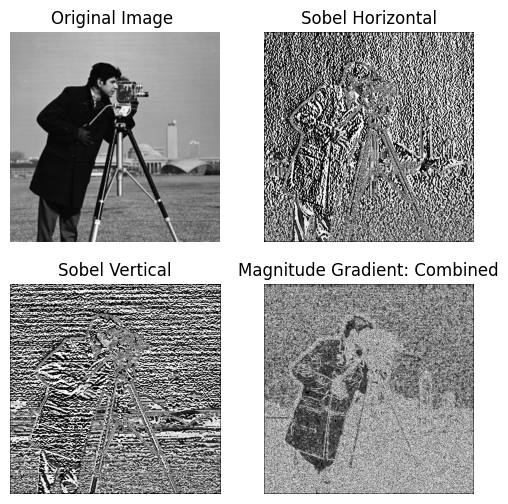

In [76]:
gradient_sobelH = sobel_horizontal_filter(img)
gradient_sobelV = sobel_vertical_filter(img)

comb_gradient = np.sqrt(gradient_sobelV ** 2 + gradient_sobelH ** 2)

plt.figure(figsize=(6, 6), dpi=100)

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image ')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gradient_sobelH, cmap='gray')
plt.title('Sobel Horizontal')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(gradient_sobelV, cmap='gray')
plt.title('Sobel Vertical')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(comb_gradient, cmap='gray')
plt.title('Magnitude Gradient: Combined')
plt.axis('off')

plt.show()

### Orientation of Sobel Edges

C:\Users\Anirvan Krishna\AppData\Local\Temp\ipykernel_24196\3483422603.py:4: RuntimeWarning: divide by zero encountered in divide
  orientation = 180 * np.arctan(gradient_sobelV / gradient_sobelH) / np.pi
C:\Users\Anirvan Krishna\AppData\Local\Temp\ipykernel_24196\3483422603.py:4: RuntimeWarning: invalid value encountered in divide
  orientation = 180 * np.arctan(gradient_sobelV / gradient_sobelH) / np.pi


(-0.5, 511.5, 511.5, -0.5)

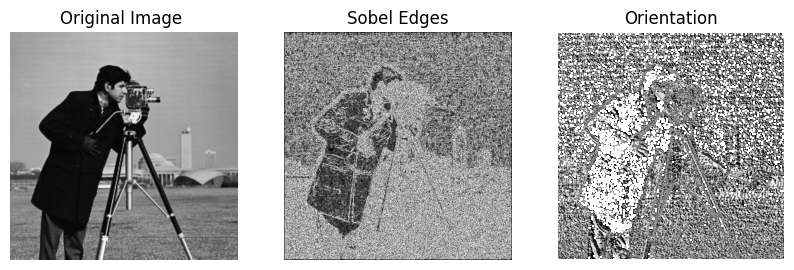

In [77]:
gradient_sobelH = sobel_horizontal_filter(img)
gradient_sobelV = sobel_vertical_filter(img)

orientation = 180 * np.arctan(gradient_sobelV / gradient_sobelH) / np.pi

plt.figure(figsize=(10, 6), dpi=100)

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image ')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(comb_gradient, cmap='gray')
plt.title('Sobel Edges')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(orientation, cmap='gray')
plt.title('Orientation')
plt.axis('off')

### Prewitt Filtering

In [78]:
def prewitt_horizontal_filter(img):
    """
    img: input image
    return: filtered image using horizontal Prewitt filter
    """
    kernel = np.array([[-1, 0, 1],
                       [-1, 0, 1],
                       [-1, 0, 1]])

    filtered_img = np.zeros_like(img)
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            filtered_img[i, j] = np.sum(img[i-1:i+2, j-1:j+2] * kernel)

    return filtered_img


def prewitt_vertical_filter(img):
    """
    img: input image
    return: filtered image using vertical Prewitt filter
    """
    kernel = np.array([[-1, -1, -1],
                       [0, 0, 0],
                       [1, 1, 1]])

    filtered_img = np.zeros_like(img)
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            filtered_img[i, j] = np.sum(img[i-1:i+2, j-1:j+2] * kernel)

    return filtered_img

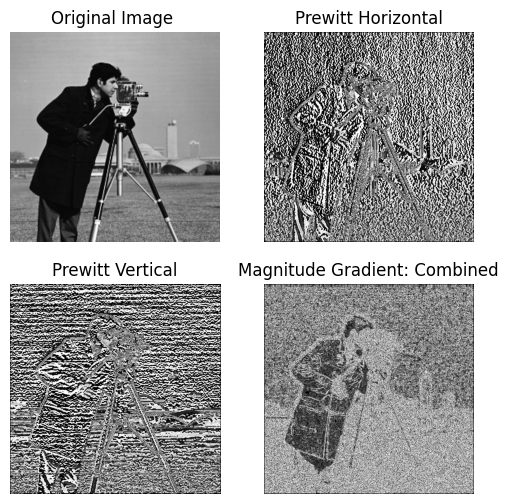

In [79]:
gradient_prewH = sobel_horizontal_filter(img)
gradient_prewV = sobel_vertical_filter(img)

comb_gradient = np.sqrt(gradient_prewV ** 2 + gradient_prewH ** 2)

plt.figure(figsize=(6, 6))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image ')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gradient_prewH, cmap='gray')
plt.title('Prewitt Horizontal')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(gradient_prewV, cmap='gray')
plt.title('Prewitt Vertical')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(comb_gradient, cmap='gray')
plt.title('Magnitude Gradient: Combined')
plt.axis('off')

plt.show()

# Advanced Edge Detection Techniques

## Canny Edge Detection

Canny Edge Detection is a multi-stage algorithm designed to detect a wide range of edges in images. It is widely regarded as one of the most effective edge detection algorithms.

### Steps Involved:

1. **Noise Reduction:**
   - The image is first smoothed using a Gaussian filter to reduce noise and spurious gradients.

2. **Gradient Calculation:**
   - The gradient intensity and direction are computed using derivative filters, often Sobel operators.
     The gradient magnitude $G$ and direction $\theta$ are then computed as:
     $$
     G = \sqrt{G_x^2 + G_y^2}
     \quad \text{and} \quad
     \theta = \tan^{-1}\left(\frac{G_y}{G_x}\right)
     $$

3. **Non-Maximum Suppression:**
   - Thin out the edges by suppressing non-maximum pixels in the gradient direction.

4. **Double Thresholding:**
   - Apply high and low thresholds to determine strong and weak edges.

5. **Edge Tracking by Hysteresis:**
   - Final edges are determined by suppressing all edges that are not connected to strong edges.

(-0.5, 511.5, 511.5, -0.5)

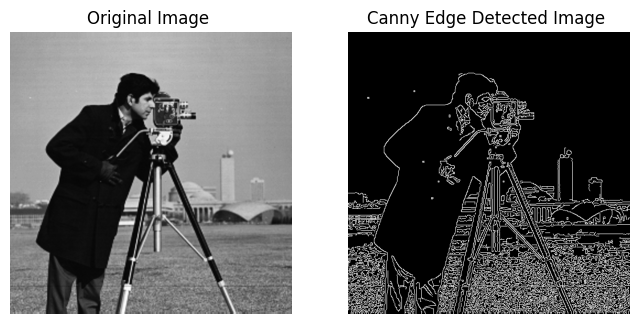

In [80]:
t_lower = 25
t_upper = 80 

canny_edges = cv2.Canny(img, t_lower, t_upper)

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image ')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(canny_edges, cmap ='gray')
plt.title ('Canny Edge Detected Image ')
plt.axis ('off')

## Laplacian of Gaussian (LoG)

The Laplacian of Gaussian (LoG) is used to detect edges by identifying regions in the image where the intensity changes rapidly. It combines Gaussian smoothing with the Laplacian operator to detect edges.

### Steps Involved:

1. **Gaussian Smoothing:**
   - The image is smoothed using a Gaussian filter to reduce noise.


2. **Laplacian Filtering:**
   - Apply the Laplacian operator to the smoothed image to highlight regions of rapid intensity change.

3. **Zero-Crossing Detection:**
   - Detect edges by finding zero crossings in the filtered image.

     The overall LoG operation can be represented as:

     $$
     LoG(x, y) = \frac{\partial^2}{\partial x^2}G(x, y) + \frac{\partial^2}{\partial y^2}G(x, y)
     $$

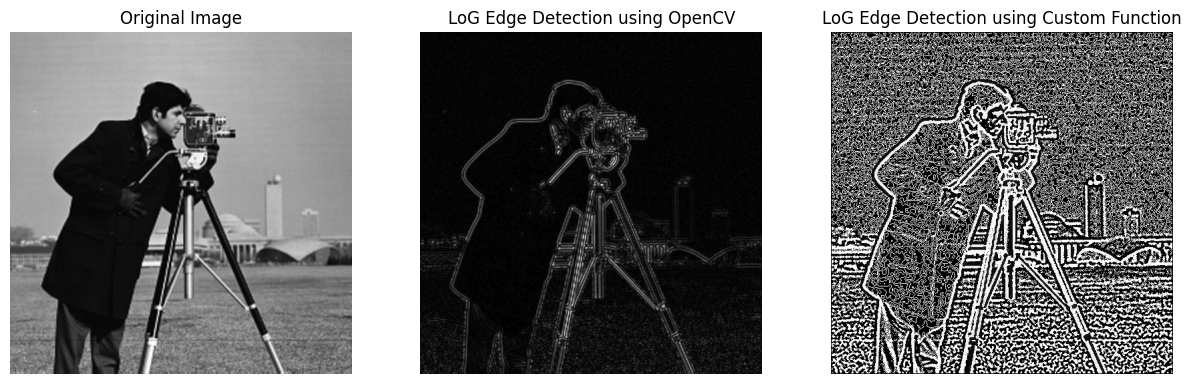

In [81]:
# Apply Gaussian blur to the image
blurred_image = cv2.GaussianBlur(img, (5, 5), 1.4)

# Apply the Laplacian operator to the blurred image
laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

laplace_custom = np.uint8(np.absolute(laplacian_filter(blurred_image)))

# Display the original and edge-detected images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap = 'gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('LoG Edge Detection using OpenCV')
plt.imshow(laplacian, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('LoG Edge Detection using Custom Function')
plt.imshow(laplace_custom, cmap='gray')
plt.axis('off')

plt.show()

## Diagonal Edge Detection

For this experiment we'll be using kernels to compute numerical gradient along the leading and trailing diagonals of the image. We're using the following filters to compute the diagonal edges:

$$\mathbf{K_{leading}} = \begin{pmatrix} -1 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 0 & -1 \end{pmatrix}$$

$$\mathbf{K_{trailing}} = \begin{pmatrix} 0 & 0 & -1 \\ 0 & 2 & 0 \\ -1 & 0 & 0 \end{pmatrix}$$

Text(0.5, 1.0, 'Combined Gradient')

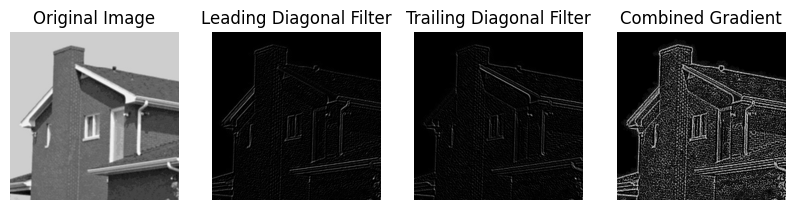

In [82]:
# Load the image
image = cv2.imread('images\house.tif', cv2.IMREAD_GRAYSCALE)

# Define the diagonal edge detection kernels
kernel_leading = np.array([[-1, 0, 0],
                           [0, 2, 0],
                           [0, 0, -1]])

kernel_trailing = np.array([[0, 0, -1],
                            [0, 2, 0],
                            [-1, 0, 0]])

# Apply the kernels to the image using convolution
edges_leading = cv2.filter2D(image, -1, kernel_leading)
edges_trailing = cv2.filter2D(image, -1, kernel_trailing)

combined = np.sqrt(edges_leading**2 + edges_trailing**2)

# Display the original image and the diagonal edges
plt.figure(figsize=(10, 10))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(edges_leading, cmap='gray')
plt.axis('off')
plt.title('Leading Diagonal Filter')

plt.subplot(1, 4, 3)
plt.imshow(edges_trailing, cmap='gray')
plt.axis('off')
plt.title('Trailing Diagonal Filter')

plt.subplot(1, 4, 4)
plt.imshow(combined, cmap='gray')
plt.axis('off')
plt.title('Combined Gradient')

## Corner Detection

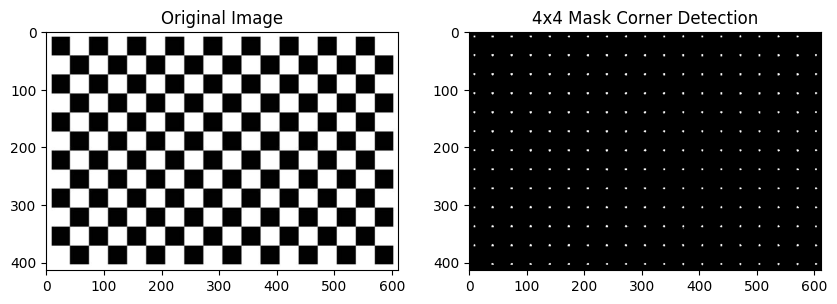

In [83]:
# Read the input image
image = cv2.imread('ChessBoard.jpg', cv2.IMREAD_GRAYSCALE)

# Define a 4x4 corner detection mask
corner_mask = np.array([
    [1,  1,  -1, -1],
    [1,  1,  -1, -1],
    [-1, -1, 1, 1],
    [-1, -1, 1, 1]
])

lead_corner = -1*corner_mask

# Apply the mask to the image
corner_response = convolve(image.astype(float), corner_mask)

corner_response2 = convolve(image.astype(float), lead_corner)

# Threshold the corner response to detect strong corners
threshold = 0.05 * corner_response.max()
corners = np.zeros_like(corner_response)

threshold2= 0.05 * corner_response2.max()
corners2 = np.zeros_like(corner_response2)

corners[(corner_response > threshold) | (corner_response2 > threshold2)] = 255

# Plot the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('4x4 Mask Corner Detection')
plt.imshow(corners, cmap='gray')

plt.show()

# Image Down-sampling

## Max Pooling

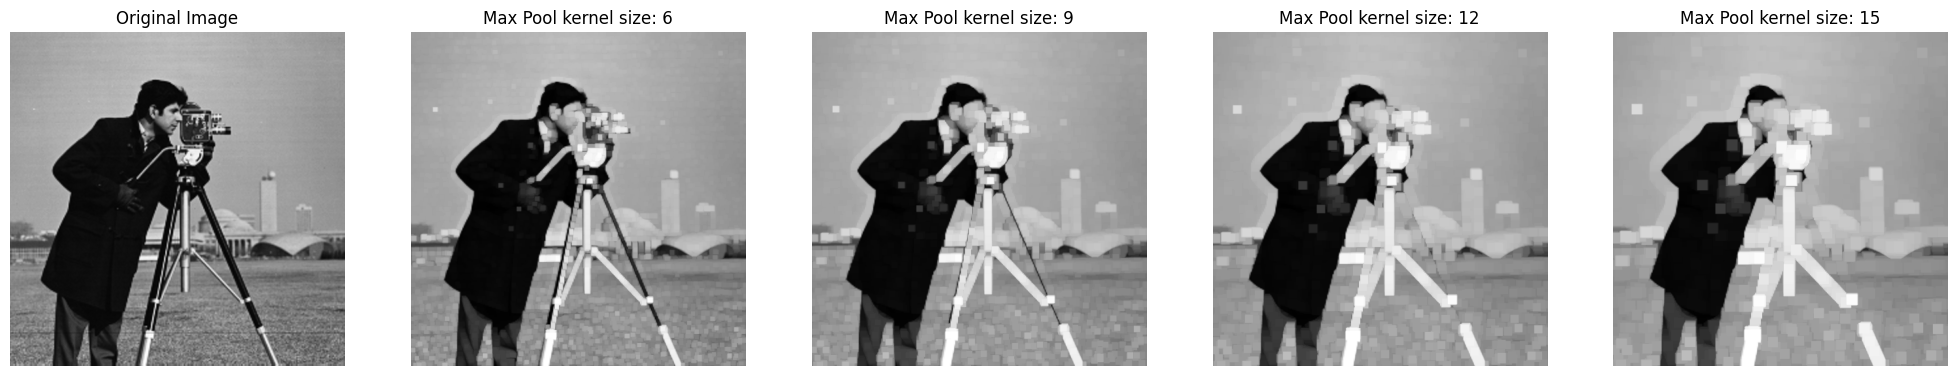

In [84]:
pooled_image = maximum_filter(img, size = 6)
plt.figure(figsize=(25, 10))

plt.subplot(1, 5, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

for i in range(2, 6):

    kernel_size = 3*i
    pooled_image = maximum_filter(img, size=kernel_size)

    plt.subplot(1, 5, i)
    plt.title(f'Max Pool kernel size: {kernel_size}')
    plt.imshow(pooled_image, cmap='gray')
    plt.axis('off')

## Average Pooling

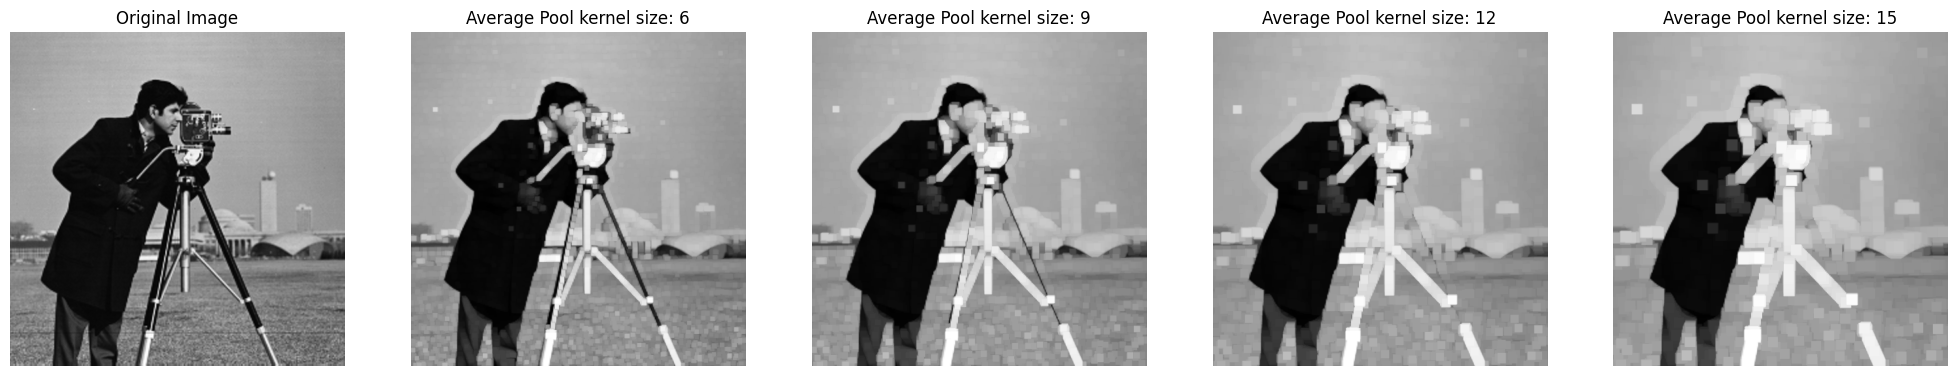

In [85]:
pooled_image = uniform_filter(img, size=6)
plt.figure(figsize=(25, 10))

plt.subplot(1, 5, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

for i in range(2, 6):

    kernel_size = 3*i
    pooled_image = maximum_filter(img, size=kernel_size)

    plt.subplot(1, 5, i)
    plt.title(f'Average Pool kernel size: {kernel_size}')
    plt.imshow(pooled_image, cmap='gray')
    plt.axis('off')

## Frequency Domain Filtering

To process the image, we first apply a Fast Fourier Transform (FFT) to convert the image from the spatial domain to the frequency domain. This is expressed mathematically as:

$$
\text{FFT}(f(x, y)) = F(u, v)
$$

where $ f(x, y) $ is the original image and $ F(u, v) $ is its frequency representation. 

Next, we shift the zero-frequency component to the center of the frequency spectrum using:

$$
\text{FFTShift}(F(u, v)) = F'(u, v)
$$

where $ F'(u, v) $ represents the shifted frequency spectrum. 

We then define a circular high-pass filter with a specified radius $ r $. The mask $ M(u, v) $ is defined as:

$$
M(u, v) = \begin{cases} 
0 & \text{if } \sqrt{(u - u_0)^2 + (v - v_0)^2} \leq r \\
1 & \text{otherwise} 
\end{cases}
$$

where $ (u_0, v_0) $ is the center of the frequency spectrum. Applying this mask to the shifted frequency spectrum removes low-frequency components:

$$
F''(u, v) = F'(u, v) \times M(u, v)
$$

We then shift the zero-frequency component back to its original position:

$$
\text{IFFTShift}(F''(u, v)) = F_{\text{filtered}}(u, v)
$$

where $ F_{\text{filtered}}(u, v) $ is the filtered frequency spectrum. We perform an inverse FFT to convert the filtered image back to the spatial domain:

$$
f_{\text{filtered}}(x, y) = \text{IFFT}(F_{\text{filtered}}(u, v))
$$

Finally, we take the absolute value to get the magnitude of the complex result and convert it to an 8-bit unsigned integer format:

$$
f_{\text{filtered}}(x, y) = \text{abs}(f_{\text{filtered}}(x, y))
$$

(-0.5, 511.5, 511.5, -0.5)

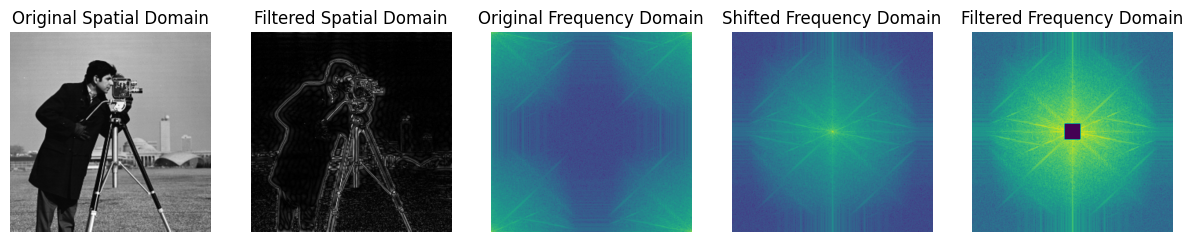

In [86]:
# Perform FFT on the image
fft_image = np.fft.fft2(img)

# Shift the zero-frequency component to the center of the spectrum
fft_shifted = np.fft.fftshift(fft_image)

# Define the radius of the circular high-pass filter
radius = 20

# Create a circular high-pass filter mask
rows, cols = img.shape
center_row, center_col = rows // 2, cols // 2
mask = np.ones((rows, cols), dtype=np.uint8)
mask[center_row - radius:center_row + radius, center_col - radius:center_col + radius] = 0

# Apply the circular high-pass filter mask to the shifted spectrum
filtered_shifted = fft_shifted * mask

# Shift the zero-frequency component back to the corner of the spectrum
filtered = np.fft.ifftshift(filtered_shifted)

# Perform inverse FFT to obtain the filtered image
filtered_image = np.fft.ifft2(filtered)

# Take the absolute value of the real part of the filtered image
filtered_image = np.abs(filtered_image)

# Convert the filtered image to uint8 data type
filtered_image = filtered_image.astype(np.uint8)

# Display the original and filtered images in spatial domain
plt.figure(figsize=(15, 5))

plt.subplot(1, 5, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Spatial Domain')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Spatial Domain')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(np.log(1 + np.abs(fft_image)))
plt.title('Original Frequency Domain')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(np.log(1 + np.abs(fft_shifted)))
plt.title('Shifted Frequency Domain')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(np.log(1 + np.abs(filtered_shifted)))
plt.title('Filtered Frequency Domain')
plt.axis('off')